# Problem - 1 

### A construction firm wants to develop a suburban locality with new infrastructure but they might incur losses if they cannot sell the properties. To overcome this, they consult an analytics firm to get insights on how densely the area is populated and the income levels of residents. Use the Support Vector Machines algorithm on the given dataset and draw out insights and also comment on the viability of investing in that area.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
import joblib,pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import os
os.chdir(r'D:\360 Data Science 360DigiTMG\Day37-SVM\Datasets-SVM\Datasets-SVM')

In [3]:
#reading datas into  python
train = pd.read_csv("SalaryData_Train.csv")

In [4]:
test = pd.read_csv("SalaryData_Test.csv")

In [5]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
train.describe(include="all")

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train.education = lb.fit_transform(train.education)
test.education = lb.fit_transform(test.education)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  int32 
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int32(1), int64(5), object(8)
memory usage: 3.1+ MB


In [10]:
train = pd.get_dummies(train,columns=["workclass","maritalstatus","occupation","relationship","race","sex","native"])

In [11]:
test = pd.get_dummies(test,columns=["workclass","maritalstatus","occupation","relationship","race","sex","native"])

In [12]:
#checking categories in Salary column
train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [13]:
x_train = train.drop("Salary",axis=1)
x_test = test.drop("Salary",axis = 1)
y_train = train.Salary
y_test = test.Salary

In [14]:
#linear model
model1 = SVC(kernel="linear",max_iter=100000)

In [15]:
model1.fit(x_train,y_train)

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=100000)

In [16]:
test_pred = model1.predict(x_test)

In [17]:
linear_accuracy = np.mean(y_test == test_pred)
linear_accuracy

0.2353253652058433

In [18]:
#rgf moodel
model2 = SVC(kernel="rbf",max_iter=150000)
model2.fit(x_train,y_train)

SVC(max_iter=150000)

In [19]:
rbf_pred=model2.predict(x_test)

In [20]:
rbf_accuracy = np.mean(y_test == rbf_pred)
rbf_accuracy

0.7964143426294821

In [21]:
#poly model
model3 = SVC(kernel="poly",max_iter=100000)
model3.fit(x_train,y_train)

SVC(kernel='poly', max_iter=100000)

In [22]:
poly_pred = model3.predict(x_test)

In [23]:
poly_accuracy = np.mean(y_test == poly_pred)
poly_accuracy

0.7795484727755644

In [24]:
#sigmoid model
model4 = SVC(kernel="sigmoid",max_iter=100000)
model4.fit(x_train,y_train)

SVC(kernel='sigmoid', max_iter=100000)

In [25]:
sigmoid_pred=model4.predict(x_test)

In [26]:
sig_accuracy = np.mean(y_test == sigmoid_pred)
sig_accuracy

0.7567729083665339

In [27]:
results = pd.DataFrame({"linear_model": linear_accuracy,"rbf_model": rbf_accuracy,"poly_accuracy":poly_accuracy,"sigmoid_accuracy":sig_accuracy},index=["Accuracy"])

In [28]:
results

,linear_model,rbf_model,poly_accuracy,sigmoid_accuracy
Accuracy,0.235325,0.796414,0.779548,0.756773


# Problem - 2

### In California, annual forest fires can cause huge loss of wildlife, human life, and can cost billions of dollars in property damage. Local officials would like to predict the size of the burnt area in forest fires annually so that they can be better prepared in future calamities. Build a Support Vector Machines algorithm on the dataset and share your insights on it in the documentation. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data into python
fire = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day37-SVM\Datasets-SVM\Datasets-SVM\forestfires.csv")
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
#information about the data
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
#split into independent and dependent variable
X = fire.drop('size_category',axis=1)
y = fire["size_category"]

In [5]:
X.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
y.head(2)

0    small
1    small
Name: size_category, dtype: object

In [7]:
#split into categorical and numerical variables
num_feat = X.select_dtypes(exclude=['object']).columns
print(num_feat)
print('\n')
cate_feat = X.select_dtypes(include=['object']).columns
print(cate_feat)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')


Index(['month', 'day'], dtype='object')


In [8]:
#checking for null values
X.isnull().any()

month       False
day         False
FFMC        False
DMC         False
DC          False
ISI         False
temp        False
RH          False
wind        False
rain        False
area        False
dayfri      False
daymon      False
daysat      False
daysun      False
daythu      False
daytue      False
daywed      False
monthapr    False
monthaug    False
monthdec    False
monthfeb    False
monthjan    False
monthjul    False
monthjun    False
monthmar    False
monthmay    False
monthnov    False
monthoct    False
monthsep    False
dtype: bool

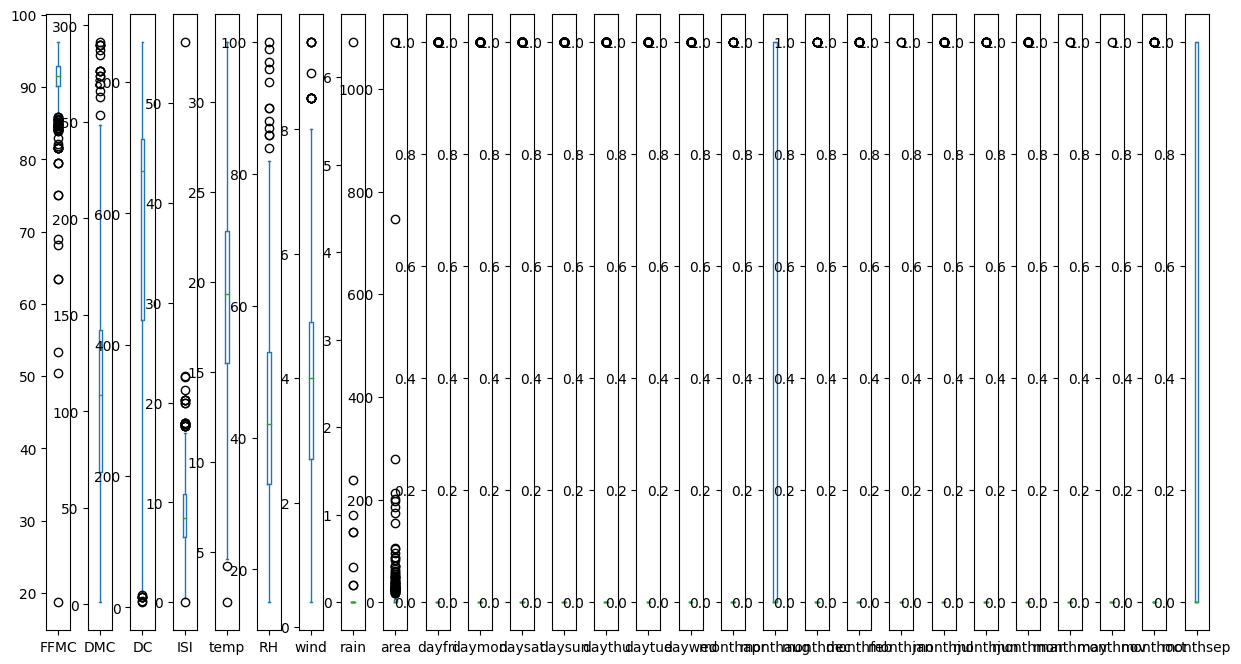

In [9]:
#checking for outliers
X.plot(kind='box',subplots=True,sharey =False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [10]:
#outlier treatment using Winsorizer
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['FFMC','DMC','DC','ISI','temp','RH','wind','area'])
clean = winsor.fit(X)

#saving the pipeline
import joblib
joblib.dump(clean,'winsor')

['winsor']

In [11]:
clean_data = clean.transform(X)

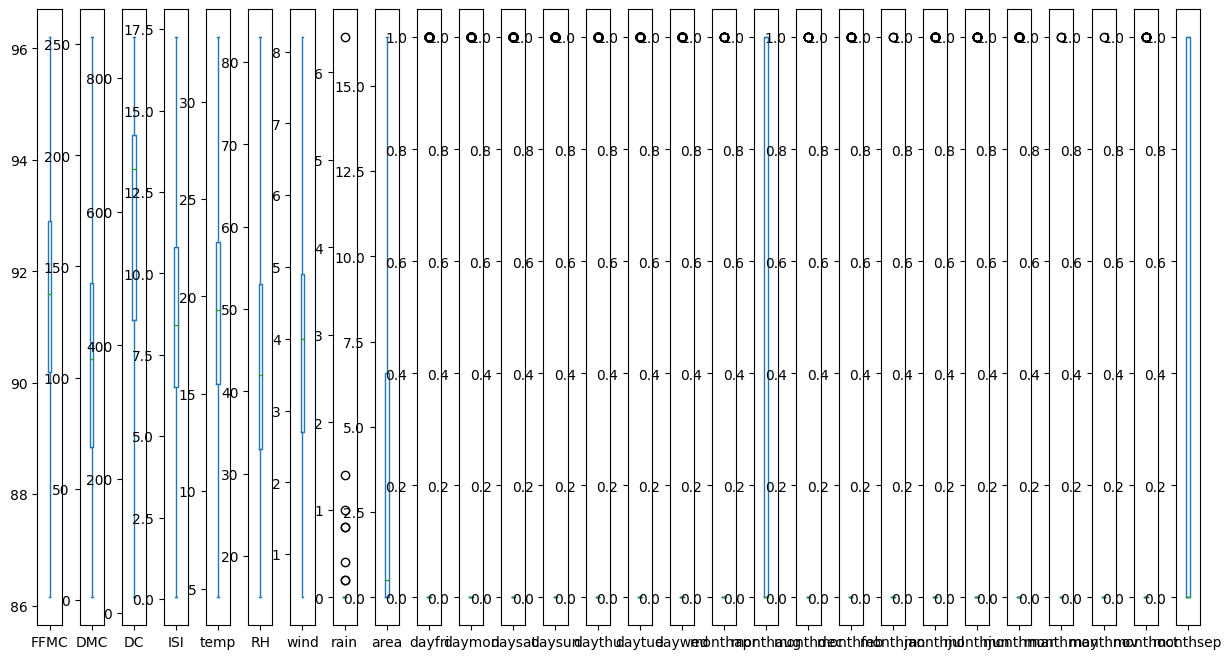

In [12]:
#verify the outlier treatment
clean_data.plot(kind='box',subplots=True,sharey =False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [13]:
#scale the numerical values using pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaling = Pipeline([('scale', StandardScaler())])
sc_preprocessor = ColumnTransformer([('scale', scaling, num_feat)])
scale = sc_preprocessor.fit(clean_data)

#save the model
joblib.dump(scale,'scaler')

['scaler']

In [14]:
scaled_data = pd.DataFrame(scale.transform(clean_data),columns=num_feat)
scaled_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-2.023755,-1.354080,-1.833254,-0.971788,-1.847959,0.438356,1.541587,-0.073268,-0.696673,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.278531,-1.205507,0.488917,-0.559328,-0.154548,-0.703997,-1.772819,-0.073268,-0.696673,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.278531,-1.071468,0.560828,-0.559328,-0.742058,-0.703997,-1.544240,-0.073268,-0.696673,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.157774,-1.239420,-1.901125,0.033582,-1.830679,2.469206,-0.001326,0.603155,-0.696673,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.794166,-0.948734,-1.801338,0.188254,-1.295008,2.469206,-1.258515,-0.073268,-0.696673,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-2.043587,-0.861528,0.474777,-1.796706,1.538862,-0.767461,-0.744211,-0.073268,0.411358,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-2.043587,-0.861528,0.474777,-1.796706,0.519360,1.707637,1.027282,-0.073268,2.129322,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-2.043587,-0.861528,0.474777,-1.796706,0.398402,1.644173,1.541587,-0.073268,1.223455,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,1.228707,0.580598,0.269143,0.626493,1.158709,-0.132820,-0.001326,-0.073268,-0.696673,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [15]:
#encoding on categorical feature
from sklearn.preprocessing import OneHotEncoder
encode = Pipeline([('encode', OneHotEncoder())])
encode_preprocessor = ColumnTransformer([('categorical',encode,cate_feat)])
encoding = encode_preprocessor.fit(X)
#saving
joblib.dump(encoding,'onehot')

['onehot']

In [16]:
encoding.get_feature_names_out()

array(['categorical__month_apr', 'categorical__month_aug',
       'categorical__month_dec', 'categorical__month_feb',
       'categorical__month_jan', 'categorical__month_jul',
       'categorical__month_jun', 'categorical__month_mar',
       'categorical__month_may', 'categorical__month_nov',
       'categorical__month_oct', 'categorical__month_sep',
       'categorical__day_fri', 'categorical__day_mon',
       'categorical__day_sat', 'categorical__day_sun',
       'categorical__day_thu', 'categorical__day_tue',
       'categorical__day_wed'], dtype=object)

In [17]:
# encode_data 
encode_data = pd.DataFrame(encoding.transform(X).todense(),
             columns=encoding.get_feature_names_out(),index=X.index)
encode_data

,categorical__month_apr,categorical__month_aug,categorical__month_dec,categorical__month_feb,categorical__month_jan,categorical__month_jul,categorical__month_jun,categorical__month_mar,categorical__month_may,categorical__month_nov,categorical__month_oct,categorical__month_sep,categorical__day_fri,categorical__day_mon,categorical__day_sat,categorical__day_sun,categorical__day_thu,categorical__day_tue,categorical__day_wed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   categorical__month_apr  517 non-null    float64
 1   categorical__month_aug  517 non-null    float64
 2   categorical__month_dec  517 non-null    float64
 3   categorical__month_feb  517 non-null    float64
 4   categorical__month_jan  517 non-null    float64
 5   categorical__month_jul  517 non-null    float64
 6   categorical__month_jun  517 non-null    float64
 7   categorical__month_mar  517 non-null    float64
 8   categorical__month_may  517 non-null    float64
 9   categorical__month_nov  517 non-null    float64
 10  categorical__month_oct  517 non-null    float64
 11  categorical__month_sep  517 non-null    float64
 12  categorical__day_fri    517 non-null    float64
 13  categorical__day_mon    517 non-null    float64
 14  categorical__day_sat    517 non-null    fl

In [19]:
#concatenate both cate and num feat 
X1 = pd.concat([scaled_data, encode_data],axis=1)
X1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,categorical__month_nov,categorical__month_oct,categorical__month_sep,categorical__day_fri,categorical__day_mon,categorical__day_sat,categorical__day_sun,categorical__day_thu,categorical__day_tue,categorical__day_wed
0,-2.023755,-1.354080,-1.833254,-0.971788,-1.847959,0.438356,1.541587,-0.073268,-0.696673,2.254407,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.278531,-1.205507,0.488917,-0.559328,-0.154548,-0.703997,-1.772819,-0.073268,-0.696673,-0.443576,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.278531,-1.071468,0.560828,-0.559328,-0.742058,-0.703997,-1.544240,-0.073268,-0.696673,-0.443576,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.157774,-1.239420,-1.901125,0.033582,-1.830679,2.469206,-0.001326,0.603155,-0.696673,2.254407,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.794166,-0.948734,-1.801338,0.188254,-1.295008,2.469206,-1.258515,-0.073268,-0.696673,-0.443576,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-2.043587,-0.861528,0.474777,-1.796706,1.538862,-0.767461,-0.744211,-0.073268,0.411358,-0.443576,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,-2.043587,-0.861528,0.474777,-1.796706,0.519360,1.707637,1.027282,-0.073268,2.129322,-0.443576,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,-2.043587,-0.861528,0.474777,-1.796706,0.398402,1.644173,1.541587,-0.073268,1.223455,-0.443576,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,1.228707,0.580598,0.269143,0.626493,1.158709,-0.132820,-0.001326,-0.073268,-0.696673,-0.443576,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
X1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,-2.283151e-15,1.000969,-2.043587,-0.437188,0.118110,0.633744,1.942662
DMC,517.0,-1.812434e-16,1.000969,-1.759426,-0.669353,-0.028228,0.522460,2.310180
DC,517.0,6.614095e-17,1.000969,-2.119687,-0.445931,0.469121,0.669907,1.262570
ISI,517.0,-6.012813e-18,1.000969,-2.273613,-0.610886,-0.121090,0.497599,2.160326
temp,517.0,8.018516e-16,1.000969,-2.478668,-0.586540,0.070088,0.674878,2.489246
RH,517.0,2.632753e-16,1.000969,-1.846350,-0.703997,-0.132820,0.565284,2.469206
wind,517.0,2.050799e-16,1.000969,-2.058544,-0.744211,-0.001326,0.512978,2.398761
rain,517.0,-2.841054e-16,1.000969,-0.073268,-0.073268,-0.073268,-0.073268,21.572284
area,517.0,3.113778e-16,1.000969,-0.696673,-0.696673,-0.607204,0.433725,2.129322
dayfri,517.0,4.874674e-17,1.000969,-0.443576,-0.443576,-0.443576,-0.443576,2.254407


In [21]:
#data partition split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,y,test_size=0.2,stratify=y)

In [22]:
#support vector classifier with linear kernal trick
from sklearn.svm import SVC

In [23]:
model_lr = SVC(kernel='linear')
model1 = model_lr.fit(X_train,Y_train)
pred_test_lr = model_lr.predict(X_test)

#Accuracy
np.mean(pred_test_lr == Y_test)

0.9711538461538461

In [24]:
#support vector classifier with RBF kernal trick

model_rbf = SVC(kernel='rbf')
model2 = model_rbf.fit(X_train,Y_train)
pred_test_rbf =model_rbf.predict(X_test)

#accuracy
np.mean(pred_test_rbf == Y_test)

0.9326923076923077

In [29]:
#hyper parameter optimization
from sklearn.model_selection import RandomizedSearchCV

model = SVC()
parameter = {'C': [0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.01, 0.001],
            'kernal':['linear', 'rbf', 'poly', 'sigmoid']}

#randomized search technique for best model
random_search = RandomizedSearchCV(model, parameter, n_iter=10, n_jobs=3, cv=3, scoring='accuracy', random_state=0)

#fittng the model grid search
randomised = rand_search.fit(X_train,Y_train)

#best params
randomised.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 10}

In [30]:
#best model
best = randomised.best_estimator_

#evaluate the test data
pred_test = best.predict(X_test)

np.mean(pred_test == Y_test)

0.9807692307692307